# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

--2021-11-21 01:48:55--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 997750 (974K) [image/jpeg]
Saving to: ‘100zloty.jpg.4’

100zloty.jpg.4      100%[===================>] 974.37K  --.-KB/s    in 0.02s   

2021-11-21 01:48:55 (44.0 MB/s) - ‘100zloty.jpg.4’ saved [997750/997750]



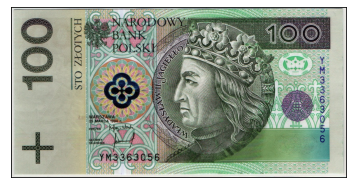

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

I = cv2.imread("100zloty.jpg")
plt.imshow(I)
plt.xticks([]), plt.yticks([])
plt.show()

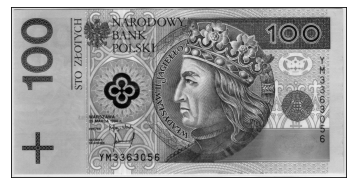

In [3]:
IG = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)
plt.imshow(IG)
plt.xticks([]), plt.yticks([])
plt.gray()
plt.show()

### Solution

Test bit $d$ of every pixel and create bitmap with 1 if it set, 0 otherwise.

In [4]:
def is_set(pixel, d):
  if (pixel & (1 << d)) != 0:
    return 1
  return 0

In [5]:
# test

pixel = IG[0,0]

print(bin(pixel)[2:])

for d in range(7,-1,-1):
  print(is_set(pixel, d), end = "")

11101001
11101001

In [6]:
# d is bit number (from 0 to 7)

def create_bit_plane(image, d):
  _is_set = np.vectorize(is_set)
  for row in image:
    return np.array([_is_set(row,d) for row in image])

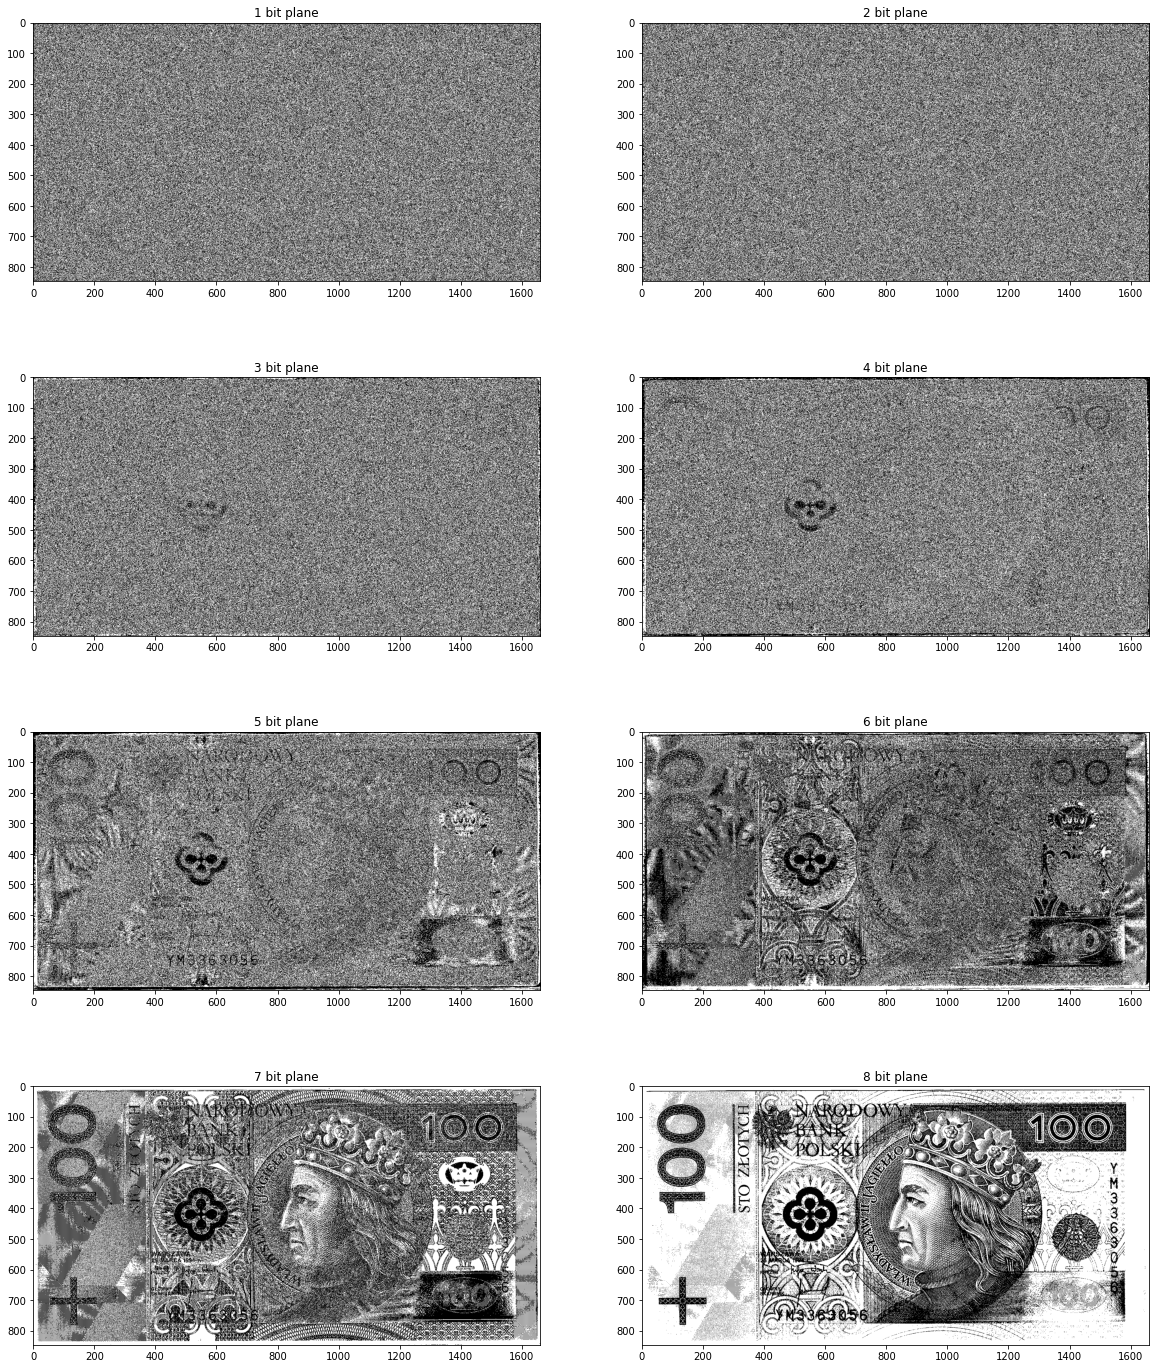

In [7]:
f, axes  = plt.subplots(4,2,figsize=(20,25))
for i in range(4):
  for j in range(2):

    bit = i * 2 + j
    axes[i,j].set_title(str(bit + 1) + " bit plane")
    axes[i,j].imshow(create_bit_plane(IG, bit))


In [8]:
# combine input bit plane with another [d] bit plane

def combine_bit_planes(input_bp, second_bp, d2):
  return input_bp + np.array([[pow(2, d2) * i for i in row] for row in second_bp])

### Combined from most significant bits

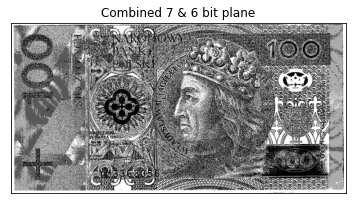

In [9]:
comb_7_6 = combine_bit_planes(create_bit_plane(IG, 7),create_bit_plane(IG, 6), 6)

plt.imshow(comb_7_6)
plt.title("Combined 7 & 6 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

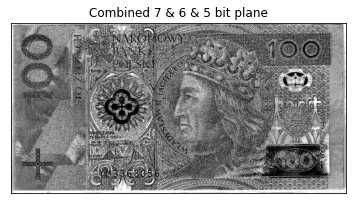

In [10]:
comb_7_6_5 = combine_bit_planes(comb_7_6,create_bit_plane(IG, 5), 5)

plt.imshow(comb_7_6_5)
plt.title("Combined 7 & 6 & 5 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

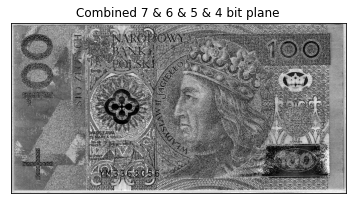

In [11]:
comb_7_6_5_4 = combine_bit_planes(comb_7_6_5, create_bit_plane(IG, 4), 4)

plt.imshow(comb_7_6_5_4)
plt.title("Combined 7 & 6 & 5 & 4 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

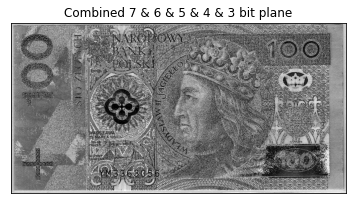

In [12]:
comb_7_6_5_4_3 = combine_bit_planes(comb_7_6_5_4, create_bit_plane(IG, 3), 3)

plt.imshow(comb_7_6_5_4_3)
plt.title("Combined 7 & 6 & 5 & 4 & 3 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

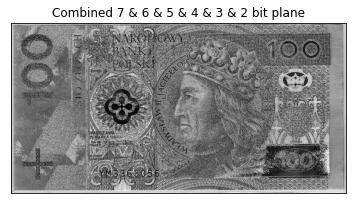

In [13]:
comb_7_6_5_4_3_2 = combine_bit_planes(comb_7_6_5_4_3, create_bit_plane(IG, 2), 2)

plt.imshow(comb_7_6_5_4_3_2)
plt.title("Combined 7 & 6 & 5 & 4 & 3 & 2 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

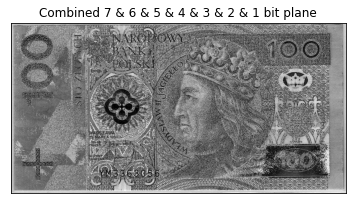

In [14]:
comb_7_6_5_4_3_2_1 = combine_bit_planes(comb_7_6_5_4_3_2, create_bit_plane(IG, 1), 1)

plt.imshow(comb_7_6_5_4_3_2)
plt.title("Combined 7 & 6 & 5 & 4 & 3 & 2 & 1 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

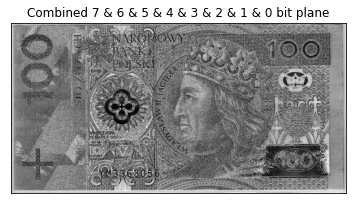

In [15]:
comb_7_6_5_4_3_2_1_0 = combine_bit_planes(comb_7_6_5_4_3_2_1, create_bit_plane(IG, 0), 0)

plt.imshow(comb_7_6_5_4_3_2)
plt.title("Combined 7 & 6 & 5 & 4 & 3 & 2 & 1 & 0 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

### Combined from less significant bits

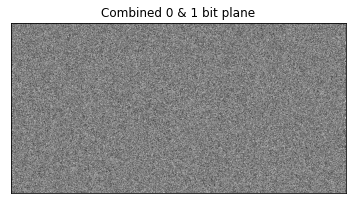

In [16]:
comb_0_1 = combine_bit_planes(create_bit_plane(IG, 0),create_bit_plane(IG, 1), 1)

plt.imshow(comb_0_1)
plt.title("Combined 0 & 1 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

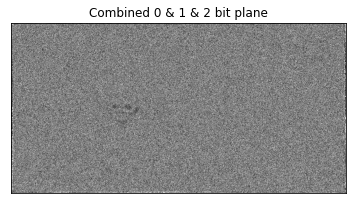

In [17]:
comb_0_1_2 = combine_bit_planes(comb_0_1,create_bit_plane(IG, 2), 2)

plt.imshow(comb_0_1_2)
plt.title("Combined 0 & 1 & 2 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

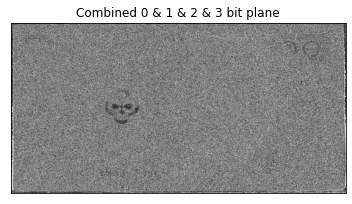

In [18]:
comb_0_1_2_3 = combine_bit_planes(comb_0_1_2,create_bit_plane(IG, 3), 3)

plt.imshow(comb_0_1_2_3)
plt.title("Combined 0 & 1 & 2 & 3 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

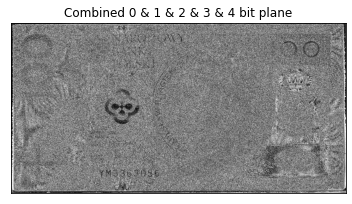

In [19]:
comb_0_1_2_3_4 = combine_bit_planes(comb_0_1_2_3,create_bit_plane(IG, 4), 4)

plt.imshow(comb_0_1_2_3_4)
plt.title("Combined 0 & 1 & 2 & 3 & 4 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

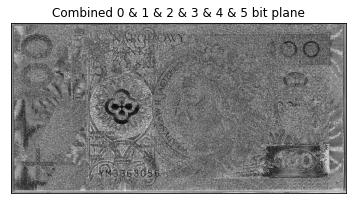

In [20]:
comb_0_1_2_3_4_5 = combine_bit_planes(comb_0_1_2_3_4,create_bit_plane(IG, 5), 5)

plt.imshow(comb_0_1_2_3_4_5)
plt.title("Combined 0 & 1 & 2 & 3 & 4 & 5 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

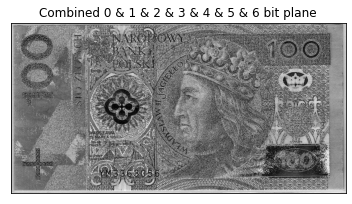

In [21]:
comb_0_1_2_3_4_5_6 = combine_bit_planes(comb_0_1_2_3_4_5,create_bit_plane(IG, 6), 6)

plt.imshow(comb_0_1_2_3_4_5_6)
plt.title("Combined 0 & 1 & 2 & 3 & 4 & 5 & 6 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

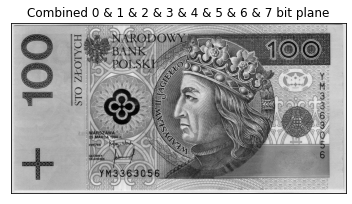

In [22]:
comb_0_1_2_3_4_5_6_7 = combine_bit_planes(comb_0_1_2_3_4_5_6,create_bit_plane(IG, 7), 7)

plt.imshow(comb_0_1_2_3_4_5_6_7)
plt.title("Combined 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 bit plane")
plt.xticks([]), plt.yticks([])
plt.show()

### Conclusions:

Most of information is contained in 7/8 bit plane. Combining few first bit planes is sufficient to get approximately original image.